<a href="https://colab.research.google.com/github/SyedZohair09/EDULUMOS-INTERSHIP-TASKS/blob/main/Task1_Smart_Study_Score_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df=pd.read_csv("/content/student_performance.csv")
df

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
...,...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0,A
999996,999997,15.7,82.7,6.7,88.3,A
999997,999998,14.2,85.1,5.8,87.9,A
999998,999999,25.3,90.0,5.3,100.0,A


In [14]:
df.shape

(1000000, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [16]:
df.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [17]:
df.isnull().sum()

,0
student_id,0
weekly_self_study_hours,0
attendance_percentage,0
class_participation,0
total_score,0
grade,0


# EDA Analysis


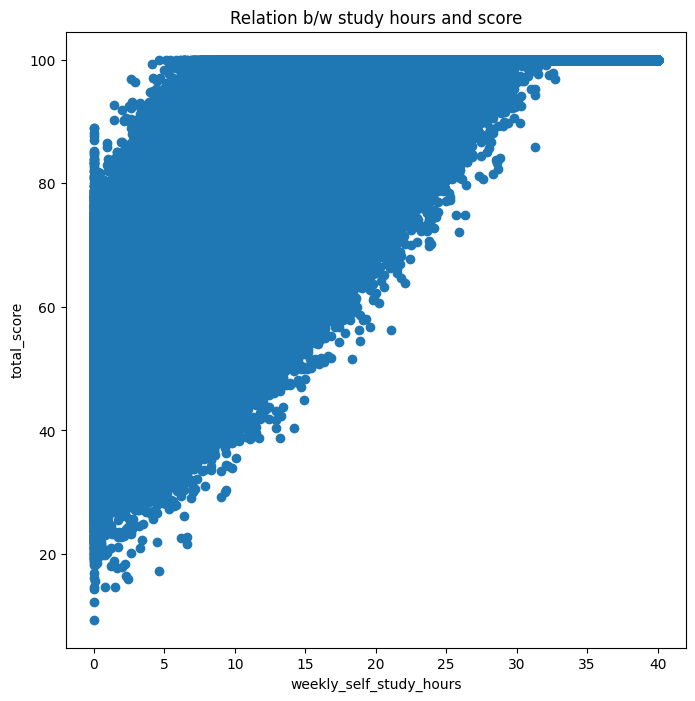

In [18]:

plt.figure(figsize=(8,8))
plt.scatter(df['weekly_self_study_hours'],df['total_score'])
plt.title("Relation b/w study hours and score")
plt.xlabel('weekly_self_study_hours')
plt.ylabel('total_score')
plt.show()

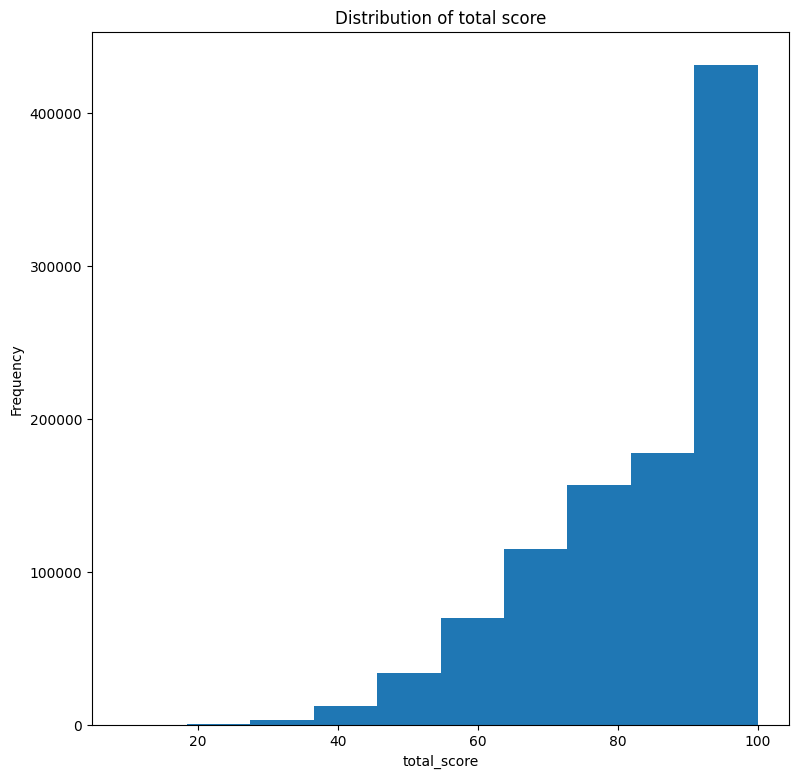

In [19]:
plt.figure(figsize=(9,9))
plt.hist(bins=10,x=df['total_score'])
plt.title("Distribution of total score")
plt.xlabel('total_score')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-868729594.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='grade',y='total_score',data=df,estimator='mean',ci=None, hue='grade')


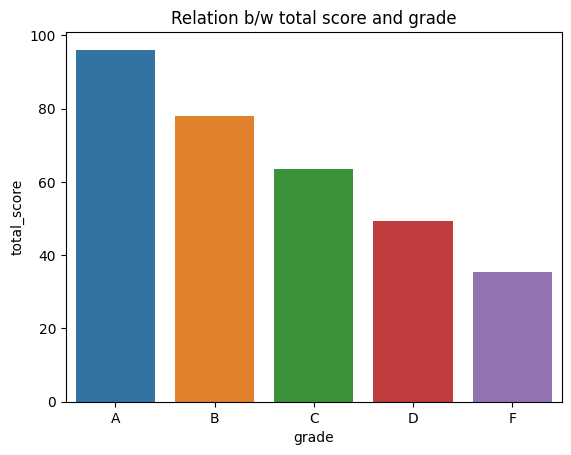

In [20]:
sns.barplot(x='grade',y='total_score',data=df,estimator='mean',ci=None, hue='grade')
plt.title("Relation b/w total score and grade")
plt.xlabel('grade')
plt.ylabel('total_score')
plt.show()

In [21]:
columns=['weekly_self_study_hours','attendance_percentage','class_participation','total_score']

corr=df[columns].corr()

print(corr)

                         weekly_self_study_hours  attendance_percentage  \
weekly_self_study_hours                 1.000000              -0.001008   
attendance_percentage                  -0.001008               1.000000   
class_participation                     0.001244              -0.000043   
total_score                             0.812241              -0.001014   

                         class_participation  total_score  
weekly_self_study_hours             0.001244     0.812241  
attendance_percentage              -0.000043    -0.001014  
class_participation                 1.000000     0.000684  
total_score                         0.000684     1.000000  


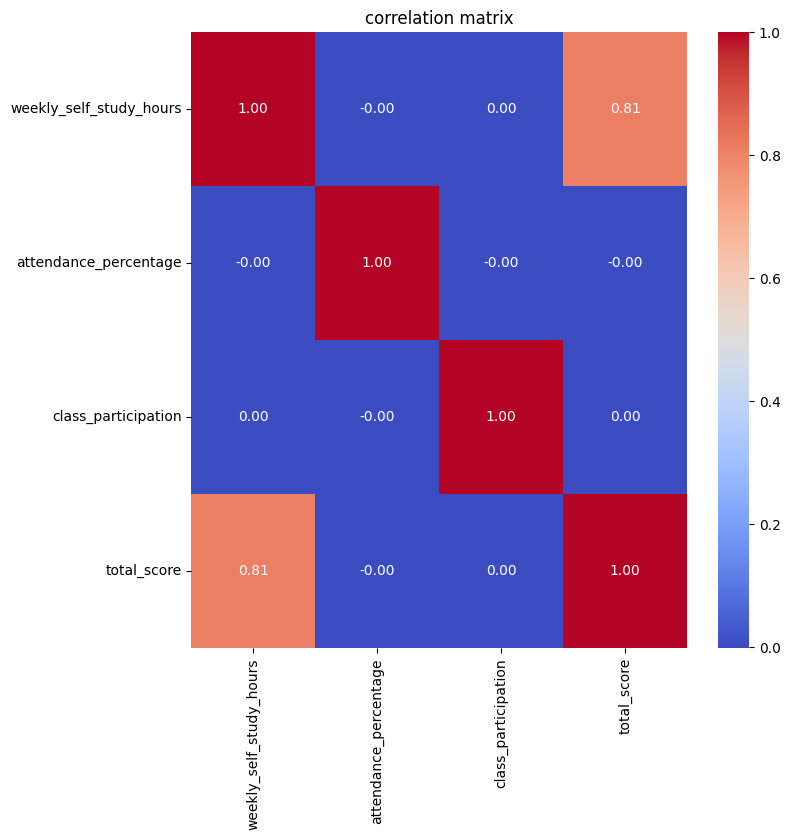

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation matrix")
plt.show()

In [23]:
df.drop('student_id',axis=1,inplace=True)
df.head()

,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,18.5,95.6,3.8,97.9,A
1,14.0,80.0,2.5,83.9,B
2,19.5,86.3,5.3,100.0,A
3,25.7,70.2,7.0,100.0,A
4,13.4,81.9,6.9,92.0,A


You can use label encoding to convert the categorical 'grade' column into numerical representations.

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['grade_encoded'] = le.fit_transform(df['grade'])

print(df[['grade', 'grade_encoded']].head())

  grade  grade_encoded
0     A              0
1     B              1
2     A              0
3     A              0
4     A              0


In [25]:
df.drop('grade',axis=1,inplace=True)

# Model Creation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [27]:
X=df.drop('total_score',axis=1)
y=df['total_score']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [30]:
y_pred=model.predict(X_test)
y_pred

array([48.32131193, 81.46020278, 77.05622334, ..., 98.50650218,
       33.21778753, 93.09598864])

In [31]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

print(f"The MAE is : {MAE}")
print(f"The MSE is : {MSE}")
print(f"The RMSE is : {RMSE}")

The MAE is : 3.3843680207292706
The MSE is : 16.572427957941972
The RMSE is : 4.070924705511264


# Regularization

In [32]:
from sklearn.linear_model import Ridge

In [39]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print("RMSE (Ridge):", rmse)

RMSE (Ridge): 4.070924798092258


In [42]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [38]:

mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
print("RMSE (Lasso):", rmse)

RMSE (Lasso): 4.074104443714769
